<a href="https://colab.research.google.com/github/kumarmohit0911/AAA/blob/main/IROC_algo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:

import json, os

kaggle_creds = {
    "username": "kumarmohit0911",
    "key": "KGAT_70d781b0a7eed54b863a6bcb5ab50e9c"
}

os.makedirs("/root/.kaggle", exist_ok=True)

with open("/root/.kaggle/kaggle.json", "w") as f:
    json.dump(kaggle_creds, f)

os.chmod("/root/.kaggle/kaggle.json", 0o600)

print("kaggle.json created successfully")

kaggle.json created successfully


In [3]:
!pip install kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json



cp: cannot stat 'kaggle.json': No such file or directory


In [4]:
import torch
import torch.nn as nn


In [5]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("stealthtechnologies/rock-classification")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'rock-classification' dataset.
Path to dataset files: /kaggle/input/rock-classification


In [6]:
os.listdir(path)

['Rock Data']

In [7]:
import os
DATA_DIR = '/root/.cache/kagglehub/datasets/stealthtechnologies/rock-classification/versions/1'
os.listdir(DATA_DIR)

['Rock Data']

In [8]:
import os
DATA_DIR = '/root/.cache/kagglehub/datasets/stealthtechnologies/rock-classification/versions/1/Rock Data'
os.listdir(DATA_DIR)

['README.dataset.txt', 'train', 'test', 'README.roboflow.txt', 'valid']

In [9]:
import torch
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [58]:
import os
train_data_paths  = []
train_labels = []
train_DATA_DIR = '/root/.cache/kagglehub/datasets/stealthtechnologies/rock-classification/versions/1/Rock Data/train'
# train_dir_list = os.listdir(train_DATA_DIR)
for rock_type in os.listdir(train_DATA_DIR):
  if rock_type == 'Shale-(Mudstone)':
    ShaleMudstone= os.path.join(train_DATA_DIR,'Shale-(Mudstone)')
    for rock_image in os.listdir(ShaleMudstone):
      train_data_paths.append(os.path.join(ShaleMudstone, rock_image))
      train_labels.append(0)
  elif rock_type =='gypsum':
    gypsum = os.path.join(train_DATA_DIR,'gypsum')
    for rock_image in os.listdir(gypsum):
      train_data_paths.append(os.path.join(gypsum,rock_image))
      train_labels.append(1)
  elif rock_type =='chert':
    chert = os.path.join(train_DATA_DIR,'chert')
    for rock_image in os.listdir(chert):
      train_data_paths.append(os.path.join(chert, rock_image))
      train_labels.append(2)
  elif rock_type =='Diatomite':
    Diatomite = os.path.join(train_DATA_DIR,'Diatomite')
    for rock_image in os.listdir(Diatomite):
      train_data_paths.append(os.path.join(Diatomite,rock_image))
      train_labels.append(3)
  elif rock_type =='olivine-basalt':
    OlivineBasalt = os.path.join(train_DATA_DIR,'olivine-basalt')
    for rock_image in os.listdir(OlivineBasalt):
      train_data_paths.append(os.path.join(OlivineBasalt, rock_image))
      train_labels.append(4)
  elif rock_type =='Siliceous-sinter':
    SiliceousSinter = os.path.join(train_DATA_DIR,'Siliceous-sinter')
    for rock_image in os.listdir(SiliceousSinter):
      train_data_paths.append(os.path.join(SiliceousSinter,rock_image))
      train_labels.append(5)
  elif rock_type =='Conglomerate':
    Conglomerate = os.path.join(train_DATA_DIR,'Conglomerate')
    for rock_image in os.listdir(Conglomerate):
      train_data_paths.append(os.path.join(Conglomerate,rock_image))
      train_labels.append(6)
  elif rock_type =='Clay':
    Clay = os.path.join(train_DATA_DIR,'Clay')
    for rock_image in os.listdir(Clay):
      train_data_paths.append(os.path.join(Clay,rock_image))
      train_labels.append(7)
  elif rock_type =='Basalt':
    Basalt = os.path.join(train_DATA_DIR,'Basalt')
    for rock_image in os.listdir(Basalt):
      train_data_paths.append(os.path.join(Basalt,rock_image))
      train_labels.append(8)

In [59]:
print(len(train_labels))

3687


In [60]:
import random
combined = list(zip(train_data_paths,train_labels))

random.shuffle(combined)
train_data_paths,train_labels = zip(*combined)

train_data_paths,train_labels = list(train_data_paths),list(train_labels)


In [61]:
len(train_data_paths)

3687

In [62]:
len(train_labels)

3687

In [63]:
type(train_data_paths)

list

In [64]:
from torchvision.transforms import transforms
custom_transform = transforms.Compose([
    transforms.Resize((128,128)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(20),
    transforms.ColorJitter(
        brightness=0.3,
        contrast=0.3,
        saturation=0.2
    ),
    transforms.ToTensor()
])

In [65]:
from torch.utils.data import DataLoader,Dataset
from PIL import Image

In [66]:
# class CustomDataset(Dataset):
#   def __init__(self,image_paths,labels,transforms = custom_transform):
#     self.images = []
#     self.image_paths = image_paths
#     self.labels = labels
#     self.transforms = transforms
#     for img in self.image_paths:
#       self.image = Image.open(img).convert('RGB')
#       self.images.append(self.image)

#   def __len__(self):
#     return len(self.images)

#   def __getitem__(self, index):

#     return self.transforms(self.images[index]),self.labels[index]
class CustomDataset(Dataset):
    def __init__(self, image_paths, labels, transforms= custom_transform):
        self.image_paths = image_paths
        self.labels = labels
        self.transforms = transforms

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, index):
        image = Image.open(self.image_paths[index]).convert('RGB')
        image = self.transforms(image)
        label = self.labels[index]
        return image, label


In [67]:
train_dataset = CustomDataset(train_data_paths,train_labels)
train_loader = DataLoader(train_dataset,batch_size=128,shuffle = True,num_workers=2,pin_memory=True,persistent_workers= True)

In [68]:
import torch.nn as nn
import torchvision.models as models
mobilenet_v2 = models.mobilenet_v2(pretrained = True)
#removing the classifier and keeping just the extractor
#mobilenet_v2.classifier = nn.Identity()
#freezing the feature extractor
for param in mobilenet_v2.features.parameters():
  param.requires_grad = False
for param in mobilenet_v2.features[-4:].parameters():
  param.requires_grad = True
for param in mobilenet_v2.classifier.parameters():
  param.requires_grad = True

In [69]:
mobilenet_v2.to(device)

MobileNetV2(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU6(inplace=True)
    )
    (1): InvertedResidual(
      (conv): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
          (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU6(inplace=True)
        )
        (1): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (2): InvertedResidual(
      (conv): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(16, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): BatchNorm2d(96, eps=

In [70]:
import torch.optim as optim
learning_rate = 1e-3
epochs = 50
Criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(filter(lambda p: p.requires_grad, mobilenet_v2.parameters()),
                        lr= learning_rate)

In [71]:
for epoch in range(epochs):
  loss_test = 0
  for image,label in train_loader:
    #moving to the gpu
    image,label = image.to(device),label.to(device)
    # forward pass
    outputs = mobilenet_v2(image)
    # calculate loss
    loss = Criterion (outputs,label)
    #back pass
    optimizer.zero_grad()
    loss.backward()
    #update grads
    optimizer.step()
    loss_test += loss.item()
  print(f'Epoch {epoch + 1} loss {loss_test/ len(train_loader)}')


Epoch 1 loss 2.7065934148328057
Epoch 2 loss 0.8757464782945041
Epoch 3 loss 0.5898482532336794
Epoch 4 loss 0.4917690332593589
Epoch 5 loss 0.3878001832756503
Epoch 6 loss 0.3220520651546018
Epoch 7 loss 0.2711451516069215
Epoch 8 loss 0.23727487490094942
Epoch 9 loss 0.22328386738382536
Epoch 10 loss 0.18007519918269124
Epoch 11 loss 0.21667104702571344
Epoch 12 loss 0.1568192047034872
Epoch 13 loss 0.1359520436360918
Epoch 14 loss 0.12050741358563818
Epoch 15 loss 0.13560419812284666
Epoch 16 loss 0.1252752179601069
Epoch 17 loss 0.09336486439509638
Epoch 18 loss 0.0933479006434309
Epoch 19 loss 0.07837380841374397
Epoch 20 loss 0.0852882248702748
Epoch 21 loss 0.09876726220907836
Epoch 22 loss 0.0887992740448179
Epoch 23 loss 0.08821762243992295
Epoch 24 loss 0.08113659732043743
Epoch 25 loss 0.08302943575484999
Epoch 26 loss 0.0789174262819619
Epoch 27 loss 0.08354895189404488
Epoch 28 loss 0.0798189723543052
Epoch 29 loss 0.06910645499311645
Epoch 30 loss 0.06665717649819522
Epoc

In [43]:
from torch.cuda.amp import autocast, GradScaler
scaler = GradScaler()
for epoch in range(epochs):
    mobilenet_v2.train()
    loss_test = 0.0

    for image, label in train_loader:
        image = image.to(device, non_blocking=True)
        label = label.to(device, non_blocking=True)

        optimizer.zero_grad()

        # forward pass with AMP
        with autocast():
            outputs = mobilenet_v2(image)
            loss = Criterion(outputs, label)

        # backward with scaled gradients
        scaler.scale(loss).backward()
        scaler.step(optimizer)
        scaler.update()

        loss_test += loss.item()

    print(f"Epoch {epoch+1} loss {loss_test / len(train_loader)}")


/tmp/ipython-input-4012115268.py:2: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = GradScaler()
/tmp/ipython-input-4012115268.py:14: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():


Epoch 1 loss 0.30173373736184217
Epoch 2 loss 0.2522984085411861
Epoch 3 loss 0.20678622378357525
Epoch 4 loss 0.18728025899878864
Epoch 5 loss 0.15181569934918962
Epoch 6 loss 0.17249118665169025
Epoch 7 loss 0.18263313611005916
Epoch 8 loss 0.14599235150320777
Epoch 9 loss 0.14942814769416018
Epoch 10 loss 0.13764474682252983
Epoch 11 loss 0.11327912568532188
Epoch 12 loss 0.11553752242491164
Epoch 13 loss 0.11379748030469336
Epoch 14 loss 0.1088581095481741
Epoch 15 loss 0.1147005326789001
Epoch 16 loss 0.10003278545778373
Epoch 17 loss 0.08039103833765819
Epoch 18 loss 0.07915367571444347
Epoch 19 loss 0.09478211312972266
Epoch 20 loss 0.0920215396146322
Epoch 21 loss 0.10576178351866788
Epoch 22 loss 0.09821312861709759
Epoch 23 loss 0.08360467183178868
Epoch 24 loss 0.07484788614614256
Epoch 25 loss 0.08440369765820174
Epoch 26 loss 0.08255280348761328
Epoch 27 loss 0.0744969489630954
Epoch 28 loss 0.06650140361282332
Epoch 29 loss 0.09725585689061675
Epoch 30 loss 0.085988296388

In [72]:
!nvidia-smi


Thu Jan 15 20:43:33 2026       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   76C    P0             96W /   70W |    1004MiB /  15360MiB |     21%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [73]:
import os
test_data_paths  = []
test_labels = []
test_DATA_DIR = '/root/.cache/kagglehub/datasets/stealthtechnologies/rock-classification/versions/1/Rock Data/test'
# train_dir_list = os.listdir(test_DATA_DIR)
for rock_type in os.listdir(test_DATA_DIR):
  if rock_type == 'Shale-(Mudstone)':
    ShaleMudstone= os.path.join(test_DATA_DIR,'Shale-(Mudstone)')
    for rock_image in os.listdir(ShaleMudstone):
      test_data_paths.append(os.path.join(ShaleMudstone, rock_image))
      test_labels.append(0)
  elif rock_type =='gypsum':
    gypsum = os.path.join(test_DATA_DIR,'gypsum')
    for rock_image in os.listdir(gypsum):
      test_data_paths.append(os.path.join(gypsum,rock_image))
      test_labels.append(1)
  elif rock_type =='chert':
    chert = os.path.join(test_DATA_DIR,'chert')
    for rock_image in os.listdir(chert):
      test_data_paths.append(os.path.join(chert, rock_image))
      test_labels.append(2)
  elif rock_type =='Diatomite':
    Diatomite = os.path.join(test_DATA_DIR,'Diatomite')
    for rock_image in os.listdir(Diatomite):
      test_data_paths.append(os.path.join(Diatomite,rock_image))
      test_labels.append(3)
  elif rock_type =='olivine-basalt':
    OlivineBasalt = os.path.join(test_DATA_DIR,'olivine-basalt')
    for rock_image in os.listdir(OlivineBasalt):
      test_data_paths.append(os.path.join(OlivineBasalt, rock_image))
      test_labels.append(4)
  elif rock_type =='Siliceous-sinter':
    SiliceousSinter = os.path.join(test_DATA_DIR,'Siliceous-sinter')
    for rock_image in os.listdir(SiliceousSinter):
      test_data_paths.append(os.path.join(SiliceousSinter,rock_image))
      test_labels.append(5)
  elif rock_type =='Conglomerate':
    Conglomerate = os.path.join(test_DATA_DIR,'Conglomerate')
    for rock_image in os.listdir(Conglomerate):
      test_data_paths.append(os.path.join(Conglomerate,rock_image))
      test_labels.append(6)
  elif rock_type =='Clay':
    Clay = os.path.join(test_DATA_DIR,'Clay')
    for rock_image in os.listdir(Clay):
      test_data_paths.append(os.path.join(Clay,rock_image))
      test_labels.append(7)
  elif rock_type =='Basalt':
    Basalt = os.path.join(test_DATA_DIR,'Basalt')
    for rock_image in os.listdir(Basalt):
      test_data_paths.append(os.path.join(Basalt,rock_image))
      test_labels.append(8)

In [74]:
len(test_labels)

174

In [75]:
test_dataset = CustomDataset(test_data_paths,test_labels)
test_loader = DataLoader(test_dataset,batch_size=128,shuffle = False,num_workers=2,pin_memory=True,persistent_workers= True)

In [92]:
import torch

def evaluate(model, dataloader, criterion, device, topk=(1, 5)):
    model.eval()

    total_loss = 0.0
    correct_top1 = 0
    correct_top5 = 0
    total = 0

    with torch.no_grad():
        for images, labels in dataloader:
            images = images.to(device, non_blocking=True)
            labels = labels.to(device, non_blocking=True)

            outputs = model(images)
            loss = criterion(outputs, labels)
            total_loss += loss.item()

            # Top-k predictions
            _, pred = outputs.topk(max(topk), dim=1, largest=True, sorted=True)
            pred = pred.t()  # shape: (k, batch_size)

            correct = pred.eq(labels.view(1, -1).expand_as(pred))

            correct_top1 += correct[:1].reshape(-1).float().sum(0).item()
            correct_top5 += correct[:4].reshape(-1).float().sum(0).item()
            total += labels.size(0)

    avg_loss = total_loss / len(dataloader)
    top1_acc = 100.0 * correct_top1 / total
    top5_acc = 100.0 * correct_top5 / total

    return avg_loss, top1_acc, top5_acc


In [94]:
test_loss, top1_acc, top5_acc = evaluate(
    mobilenet_v2,
    test_loader,
    Criterion,
    device
)

print(f"Test Loss: {test_loss:.4f}")
print(f"Top-1 Accuracy: {top1_acc:.2f}%")
print(f"Top-4 Accuracy: {top5_acc:.2f}%")


Test Loss: 1.8296
Top-1 Accuracy: 62.07%
Top-4 Accuracy: 90.23%


In [78]:
import torch

def evaluate_accuracy(model, dataloader, device):
    model.eval()
    correct = 0
    total = 0

    with torch.no_grad():
        for images, labels in dataloader:
            images = images.to(device, non_blocking=True)
            labels = labels.to(device, non_blocking=True)

            outputs = model(images)
            _, preds = torch.max(outputs, 1)

            correct += (preds == labels).sum().item()
            total += labels.size(0)

    accuracy = 100.0 * correct / total
    return accuracy


In [79]:
test_acc = evaluate_accuracy(mobilenet_v2, test_loader, device)
print(f"Test Accuracy: {test_acc:.2f}%")


Test Accuracy: 63.22%


In [84]:
import torch
import numpy as np

def get_preds_and_probs(model, dataloader, device):
    model.eval()

    all_labels = []
    all_preds = []
    all_probs = []

    with torch.no_grad():
        for images, labels in dataloader:
            images = images.to(device, non_blocking=True)
            labels = labels.to(device, non_blocking=True)

            outputs = model(images)
            probs = torch.softmax(outputs, dim=1)

            _, preds = torch.max(outputs, 1)

            all_labels.extend(labels.cpu().numpy())
            all_preds.extend(preds.cpu().numpy())
            all_probs.extend(probs.cpu().numpy())

    return np.array(all_labels), np.array(all_preds), np.array(all_probs)


In [85]:
y_true, y_pred, y_prob = get_preds_and_probs(
    mobilenet_v2,
    test_loader,
    device
)


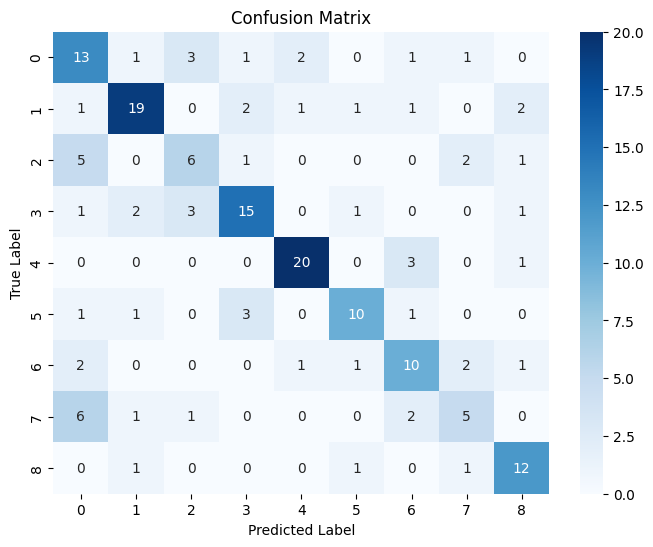

In [86]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


In [87]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

num_classes = y_prob.shape[1]

# Binarize labels
y_true_bin = label_binarize(y_true, classes=range(num_classes))

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_ran

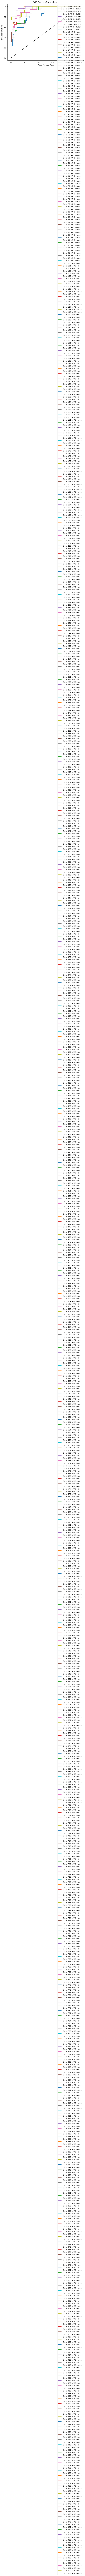

In [88]:
plt.figure(figsize=(8, 6))

for i in range(num_classes):
    plt.plot(
        fpr[i], tpr[i],
        label=f"Class {i} (AUC = {roc_auc[i]:.2f})"
    )

plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (One-vs-Rest)")
plt.legend()
plt.show()


In [89]:
from sklearn.metrics import roc_auc_score

macro_auc = roc_auc_score(y_true_bin, y_prob, average="macro")
micro_auc = roc_auc_score(y_true_bin, y_prob, average="micro")

print(f"Macro ROC-AUC: {macro_auc:.4f}")
print(f"Micro ROC-AUC: {micro_auc:.4f}")


Macro ROC-AUC: nan
Micro ROC-AUC: 0.9960


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_ranking.py:379: UndefinedMetricWarning: Only one class is present in y_true. ROC AUC score is not defined in that case.
  warnings.warn(


In [90]:
import numpy as np

unique, counts = np.unique(y_true, return_counts=True)
print(dict(zip(unique, counts)))


{np.int64(0): np.int64(22), np.int64(1): np.int64(27), np.int64(2): np.int64(15), np.int64(3): np.int64(23), np.int64(4): np.int64(24), np.int64(5): np.int64(16), np.int64(6): np.int64(17), np.int64(7): np.int64(15), np.int64(8): np.int64(15)}


In [91]:
from sklearn.metrics import roc_auc_score

valid_classes = [
    i for i in range(num_classes)
    if len(np.unique(y_true_bin[:, i])) > 1
]

macro_auc_safe = roc_auc_score(
    y_true_bin[:, valid_classes],
    y_prob[:, valid_classes],
    average="macro"
)

print(f"Safe Macro ROC-AUC: {macro_auc_safe:.4f}")


Safe Macro ROC-AUC: 0.9210
